In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"E:\Data_science\Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [18]:
# converting to the timestamp 
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [19]:
df['Driver id'] = df['Driver id'].fillna(0)
df['Driver id'] = df['Driver id'].astype(np.int64)

In [20]:
# Creating the Hour from the Request timestamp
df['Req_Hour']=df['Request timestamp'].dt.hour

In [21]:
# finding the datatypes
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                     int64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Req_Hour                      int64
dtype: object

In [22]:
# Selecting the first 5 records of created the columns.
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_Hour
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [23]:
# Creating the Time_slot function based on the Hourly based

def flag_df(df):
    if (df['Req_Hour'] < 8):
        return 'Early Morning'
    elif (df['Req_Hour'] >=8 and df['Req_Hour'] <12):
        return 'Morning'
    elif (df['Req_Hour'] >=12 and df['Req_Hour'] <16):
        return 'Afternoon'
    elif (df['Req_Hour'] >=16 and df['Req_Hour'] <20):
        return 'Evening'
    elif (df['Req_Hour'] >=20 and df['Req_Hour'] <=24):
        return 'Late Night'

In [24]:
# Applying the Time_slot column to the dataframe
df['Time_Slot']=df.apply(flag_df, axis=1)

In [25]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_Hour,Time_Slot
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Late Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [26]:
import seaborn as sns

In [27]:
df1=round(df['Status'].value_counts().sum()/df['Status'].value_counts(),2)

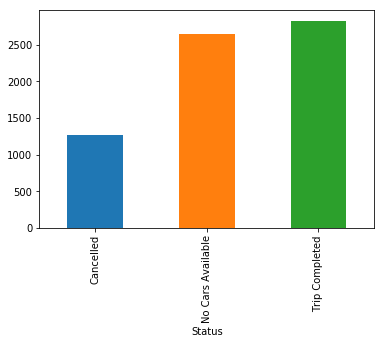

In [28]:
df.groupby('Status')['Request id'].nunique().plot(kind='bar')
plt.show()

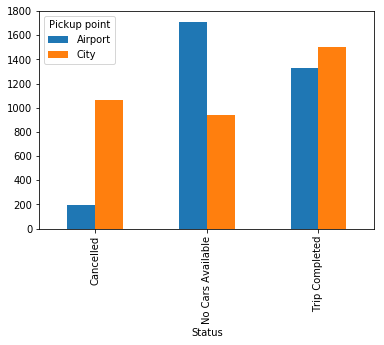

In [29]:
df.groupby(['Status','Pickup point'])['Request id'].size().unstack().plot(kind='bar',stacked=False)
plt.show()

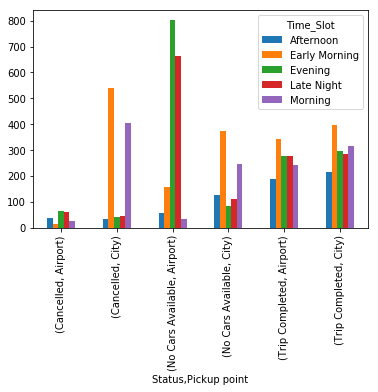

In [30]:
#Created the graph with TimeSlot of timings.
df.groupby(['Status','Pickup point','Time_Slot'])['Request id'].size().unstack().plot(kind='bar',stacked=False)
plt.show()

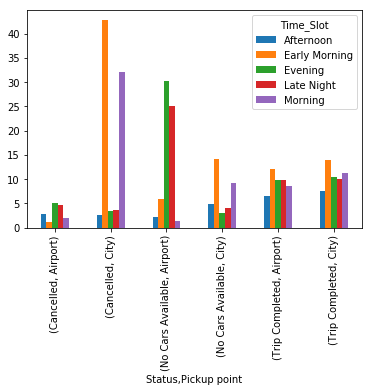

In [31]:
# Created the graph of Percentage 
df.groupby(['Status','Pickup point','Time_Slot']).size().groupby(level=0).apply(lambda x:100 * x/x.sum()).unstack().plot(kind='bar',stacked=False)
plt.show()

In [33]:
# Created the demand and supply variables

df1_supply=df.loc[df['Status']=='Trip Completed']
df1_demand=df[(df['Status']=='Trip Completed') | (df['Status']=='No Cars Available') | (df['Status']=='Cancelled')]

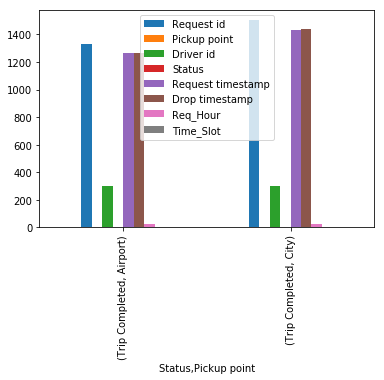

In [42]:
# Created the Supply graph with difference of Airport and city
df1_supply.groupby(['Status','Pickup point']).nunique().plot(kind='bar')
plt.show()



C:\Users\Rajini\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:3766: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


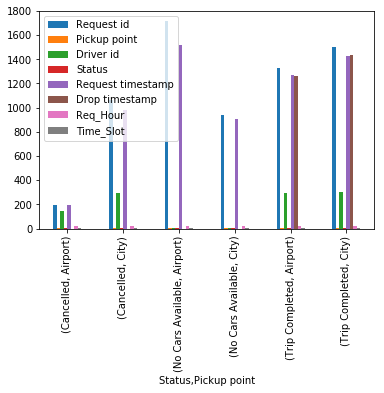

In [44]:
# Created the demand graph with difference of Airport and city
df1_demand.groupby(['Status','Pickup point']).nunique().plot(kind='bar')
plt.show()